<a href="https://colab.research.google.com/github/subhrasankar/ssc/blob/main/cluster_and_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your file:


Saving cleaned_data.csv to cleaned_data.csv
File uploaded: cleaned_data.csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298926 entries, 0 to 298925
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         298926 non-null  int64 
 1   airline            298926 non-null  object
 2   flight_code        298926 non-null  object
 3   source_city        298926 non-null  object
 4   time_taken         298926 non-null  int64 
 5   stop               298926 non-null  object
 6   destinate_city     298926 non-null  object
 7   price              298926 non-null  int64 
 8   Class              298926 non-null  object
 9   Days_Left          298926 non-null  int64 
 10  dep_time_category  298926 non-null  object
 11  arr_time_category  298926 non-null  object
dtypes: int64(4), object(8)
memory usage: 27.4+ MB
None

Preview of Dataset:
   Unnamed: 0   airline flight_code source_

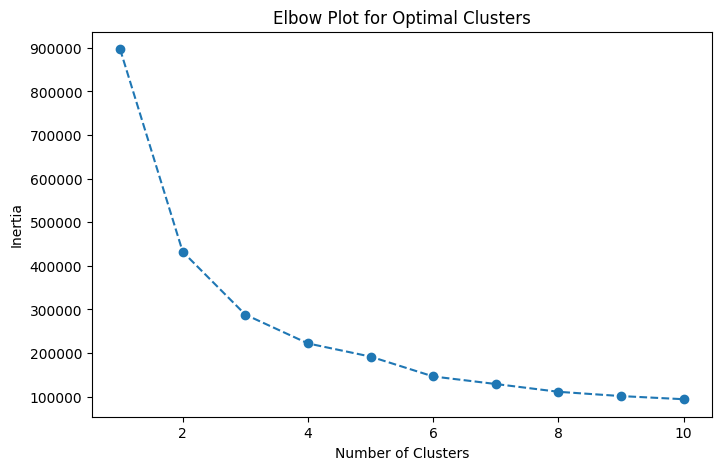

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


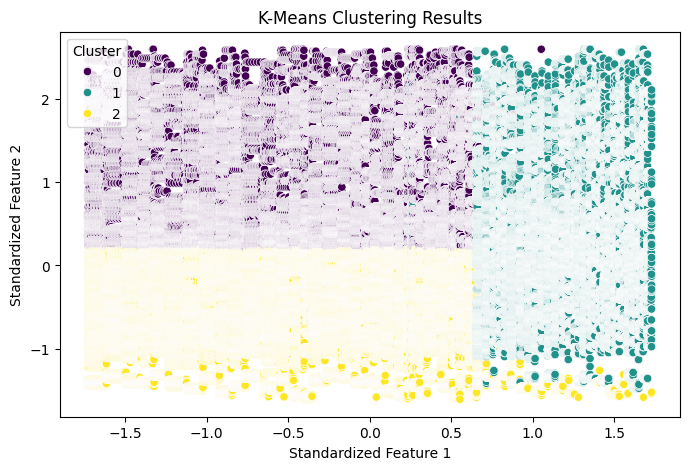

Mean Squared Error: 177.95
R-squared: 0.02


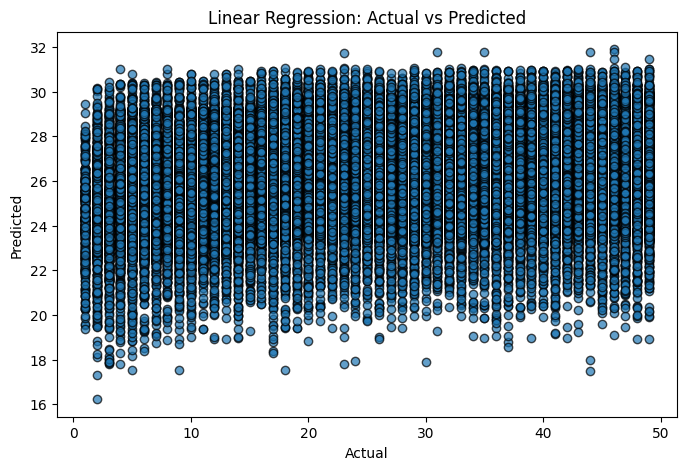

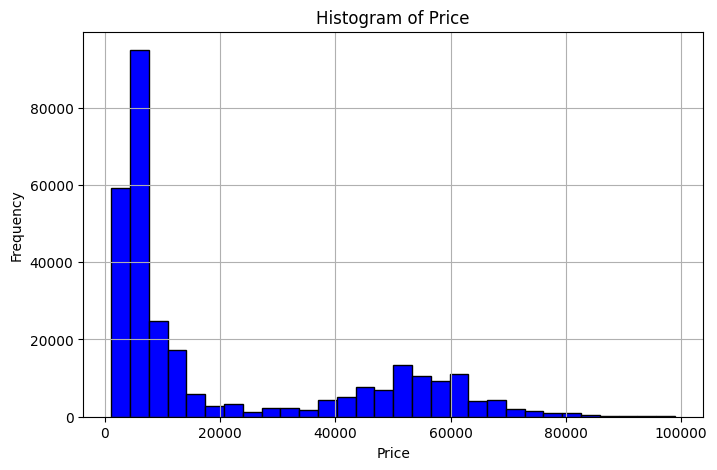

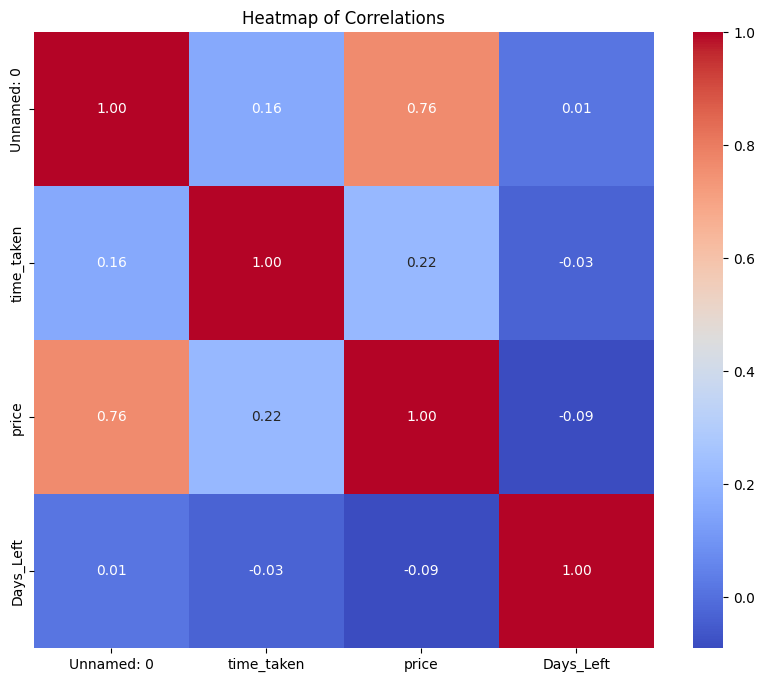

Processed data with clusters saved to 'processed_data_with_clusters.csv'.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# -------- Upload File in Google Colab -------- #

# Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Get the uploaded file's name
file_name = list(uploaded.keys())[0]
print(f"File uploaded: {file_name}")

# Load the file into a pandas DataFrame
df = pd.read_csv(file_name)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nPreview of Dataset:")
print(df.head())

# Handle missing values (if any)
df = df.dropna()
print("\nAfter dropping missing values, dataset shape:", df.shape)

# -------- Clustering Analysis -------- #

# Select numerical features for clustering
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist() #  select_dtypes is part of the pandas libraty in the is used to find out the  cloumes from the dataframe or dataset in the based on the datatype
# in select_dtypes() function here a a parameter called include, which takes value in form of list it is iin this code we use a squre bracates here
# we want to indentify the those columns which contains the numeric values here we use a shorthand trick expect using the manual way like np.int64 or np.float64
# which datatype is chossean here then those columns name is store in columns in
# the from of object and to convert in from of list we use here .tolist()

print("\nNumeric columns detected for clustering and regression:", numeric_columns)

if len(numeric_columns) < 3:
    print("Insufficient numeric columns for clustering. Clustering skipped.")
else:
    clustering_data = df[numeric_columns[:3]]  # Use the first 3 numeric columns

    # Standardize the data
    scaler = StandardScaler() # it creats the a
    clustering_data_scaled = scaler.fit_transform(clustering_data) #it is the function which is used for calculate the two different step calculate the mean and calculate the senderised
    #Fit: It calculates the mean and standard deviation for each feature (column) in clustering_data.
# Transform: It then uses those mean and standard deviation values to standardize the data by applying the formula:
# Standardized value
# =
# Value− Mean/ Standard Deviation


    # Elbow Method to determine optimal clusters
    inertia = []
    range_n_clusters = range(1, 11)
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(clustering_data_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Perform K-means clustering with an optimal number of clusters (choose 3 for example)
    optimal_clusters = 3
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

    # Visualize clusters (scatter plot for first two features)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=clustering_data_scaled[:, 0], y=clustering_data_scaled[:, 1],
                    hue=df['Cluster'], palette='viridis')
    plt.title('K-Means Clustering Results')
    plt.xlabel('Standardized Feature 1')
    plt.ylabel('Standardized Feature 2')
    plt.legend(title='Cluster')
    plt.show()

# -------- Regression Analysis -------- #

if len(numeric_columns) < 2:
    print("Insufficient numeric columns for regression. Regression skipped.")
else:
    # Dynamically define features (X) and target (y)
    X = df[numeric_columns[:-1]]  # Use all numeric columns except the last one as features
    y = df[numeric_columns[-1]]   # Use the last numeric column as the target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# -------- Additional Graphs -------- #

# Histogram of a numeric column
if 'price' in df.columns:
    plt.figure(figsize=(8, 5))
    df['price'].hist(bins=30, color='blue', edgecolor='black')
    plt.title('Histogram of Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()

# Save processed data (if needed)
df.to_csv('processed_data_with_clusters.csv', index=False)
print("Processed data with clusters saved to 'processed_data_with_clusters.csv'.")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data=pd.DataFrame({
    'age':[25,30,35,40,45,50,55,60],
    'income':[50000,60000,75000,90000,80000,100000,110000,120000],
    'education':['high school','bachelor','master','phd','high school','bachelor','master','phd'],
    'name':['Alice','Bob','Charlie','David','Eve','Frank','Grace','Henry']
})


fr=data.select_dtypes(include=np.number).columns.tolist()
print(fr)

scaler=StandardScaler()
scaler.fit_transform(data[fr])

['age', 'income']


array([[-1.52752523, -1.5790746 ],
       [-1.09108945, -1.13582559],
       [-0.65465367, -0.47095207],
       [-0.21821789,  0.19392144],
       [ 0.21821789, -0.24932757],
       [ 0.65465367,  0.63717045],
       [ 1.09108945,  1.08041946],
       [ 1.52752523,  1.52366847]])